<a href="https://colab.research.google.com/github/Saranya003/ML-Projects/blob/main/Item_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Demand forecasts are fundamental to plan and deliver products and services. Accurate forecasting of demand can help the manufacturers to maintain appropriate stock which results in reduction in loss due to product not being sold and also reduces the opportunity cost (i.e. higher demand but less availability => opportunity lost). Despite such relevance, manufacturers have difficulty choosing which forecast model is the best for their use case. In this project, historical sales data corresponding to multiple(25) items sold in 10 stores are provided and participants are expected to come up with a best model to predict the future demand for products which results in maximum profit for the manufacturer.** Predict the demand for the next 3 months at the item level (i.e. all the stores combined).**


# Data

The historical sales data is available in https://drive.google.com/file/d/1zxwznm7mT8uLbXSY9YmovTilWhpFuHg1/view. 
The item, store and sales details are provided at the daily level for a period spanning 4 years. 

# Index



1.   Importing important packages
2.   Reading the dataset
3. Data Preprocessing- Handling Missing values
4. Creating a third_month column in the dataframe
5. calculating the demand for next three months for each day i.e. each date.
6. Encoding the date.
7. Splitting the dataframe based on the distinct item
8. Splitting of train-test dataset and predicting the data using different regression models.
9. Best Regression Algorithm for predicting the given dataset.


# Importing important packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Reading the dataset

In [ ]:
df = pd.read_csv("train 2.csv")

In [ ]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [ ]:
df.shape

(913000, 4)

# Data Preprocessing- Handling Missing values

In [ ]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
df=df.drop(['store'], axis=1)

According to given instruction store is not taken into consideration. Since demand of product is not take based on particular store needs. The demand is taken based on the sales rate of the product for 3 months timeline.

In [ ]:
df

,date,item,sales
0,2013-01-01,1,13
1,2013-01-02,1,11
2,2013-01-03,1,14
3,2013-01-04,1,13
4,2013-01-05,1,10
...,...,...,...
912995,2017-12-27,50,63
912996,2017-12-28,50,59
912997,2017-12-29,50,74
912998,2017-12-30,50,62


In [ ]:
df.drop_duplicates()
df

,date,item,sales
0,2013-01-01,1,13
1,2013-01-02,1,11
2,2013-01-03,1,14
3,2013-01-04,1,13
4,2013-01-05,1,10
...,...,...,...
912995,2017-12-27,50,63
912996,2017-12-28,50,59
912997,2017-12-29,50,74
912998,2017-12-30,50,62


In [ ]:
df.dtypes

date     object
item      int64
sales     int64
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df

,date,item,sales
0,2013-01-01,1,13
1,2013-01-02,1,11
2,2013-01-03,1,14
3,2013-01-04,1,13
4,2013-01-05,1,10
...,...,...,...
912995,2017-12-27,50,63
912996,2017-12-28,50,59
912997,2017-12-29,50,74
912998,2017-12-30,50,62


In [ ]:
df.dtypes

date     datetime64[ns]
item              int64
sales             int64
dtype: object

# Creating a third_month column in the dataframe

In [ ]:
from datetime import datetime
from datetime import timedelta

In [ ]:
df['third_month']=df['date']+ timedelta(days=90)
df

,date,item,sales,third_month
0,2013-01-01,1,13,2013-04-01
1,2013-01-02,1,11,2013-04-02
2,2013-01-03,1,14,2013-04-03
3,2013-01-04,1,13,2013-04-04
4,2013-01-05,1,10,2013-04-05
...,...,...,...,...
912995,2017-12-27,50,63,2018-03-27
912996,2017-12-28,50,59,2018-03-28
912997,2017-12-29,50,74,2018-03-29
912998,2017-12-30,50,62,2018-03-30


# calculating the demand for next three months for each day i.e. each date.

In [ ]:
def demand_calculation(row):
  df3=df[(df['date'] >= row['date']) & (df['date']<=row['third_month']) & (row['item']==df['item'])]
  # df3=df[(df2['date'] >= df['date'][0]) & (df2['date']<=df2['third_month'][0]) & (df['item'][0]==df2['item'])]
  return df3['sales'].sum()

In [ ]:
df['demand']=df.apply(demand_calculation,axis=1)
df

,date,item,sales,third_month,demand
0,2013-01-01,1,13,2013-04-01,12981
1,2013-01-02,1,11,2013-04-02,13035
2,2013-01-03,1,14,2013-04-03,13146
3,2013-01-04,1,13,2013-04-04,13248
4,2013-01-05,1,10,2013-04-05,13302
...,...,...,...,...,...
912995,2017-12-27,50,63,2018-03-27,2932
912996,2017-12-28,50,59,2018-03-28,2421
912997,2017-12-29,50,74,2018-03-29,1834
912998,2017-12-30,50,62,2018-03-30,1238


In [ ]:
df=df.drop(['third_month'], axis=1)

The purpose of third_month column is fulfilled. Therefore, It is no longer required.

In [ ]:
df

,date,item,sales,demand
0,2013-01-01,1,13,12981
1,2013-01-02,1,11,13035
2,2013-01-03,1,14,13146
3,2013-01-04,1,13,13248
4,2013-01-05,1,10,13302
...,...,...,...,...
912995,2017-12-27,50,63,2932
912996,2017-12-28,50,59,2421
912997,2017-12-29,50,74,1834
912998,2017-12-30,50,62,1238


# Encoding the date.

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [ ]:
df

,date,item,sales,demand,year,month,day
0,2013-01-01,1,13,12981,2013,1,1
1,2013-01-02,1,11,13035,2013,1,2
2,2013-01-03,1,14,13146,2013,1,3
3,2013-01-04,1,13,13248,2013,1,4
4,2013-01-05,1,10,13302,2013,1,5
...,...,...,...,...,...,...,...
912995,2017-12-27,50,63,2932,2017,12,27
912996,2017-12-28,50,59,2421,2017,12,28
912997,2017-12-29,50,74,1834,2017,12,29
912998,2017-12-30,50,62,1238,2017,12,30


In [ ]:
df=df.drop(['date'], axis=1)
df

,item,sales,demand,year,month,day
0,1,13,12981,2013,1,1
1,1,11,13035,2013,1,2
2,1,14,13146,2013,1,3
3,1,13,13248,2013,1,4
4,1,10,13302,2013,1,5
...,...,...,...,...,...,...
912995,50,63,2932,2017,12,27
912996,50,59,2421,2017,12,28
912997,50,74,1834,2017,12,29
912998,50,62,1238,2017,12,30


# Splitting the dataframe based on the distinct item

In [ ]:
df.item.value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

**There are totally 50 items in the dataframe.**

splitting the items into different tuples and store it in a dictionary.

where item number is consider as key and data frame related to item number is considered as values.

In [ ]:
df_d = dict(tuple(df.groupby("item")))
df_d

{1:        item  sales  demand  year  month  day
 0         1     13   12981  2013      1    1
 1         1     11   13035  2013      1    2
 2         1     14   13146  2013      1    3
 3         1     13   13248  2013      1    4
 4         1     10   13302  2013      1    5
 ...     ...    ...     ...   ...    ...  ...
 18255     1     19    1002  2017     12   27
 18256     1     12     848  2017     12   28
 18257     1     23     670  2017     12   29
 18258     1     26     463  2017     12   30
 18259     1     27     227  2017     12   31
 
 [18260 rows x 6 columns], 2:        item  sales  demand  year  month  day
 18260     2     33   35051  2013      1    1
 18261     2     43   35196  2013      1    2
 18262     2     23   35417  2013      1    3
 18263     2     18   35607  2013      1    4
 18264     2     34   35776  2013      1    5
 ...     ...    ...     ...   ...    ...  ...
 36515     2     43    2682  2017     12   27
 36516     2     35    2182  2017     12   28


In [ ]:
#sample view
dfT=df_d[1]
dfT=dfT.drop(['demand'], axis=1)
dfT

,item,sales,year,month,day
0,1,13,2013,1,1
1,1,11,2013,1,2
2,1,14,2013,1,3
3,1,13,2013,1,4
4,1,10,2013,1,5
...,...,...,...,...,...
18255,1,19,2017,12,27
18256,1,12,2017,12,28
18257,1,23,2017,12,29
18258,1,26,2017,12,30


In [ ]:
df.year.value_counts()

2016    183000
2013    182500
2014    182500
2015    182500
2017    182500
Name: year, dtype: int64

# Splitting of train-test dataset and predicting the data using different regression models.

Since the data is a continuous data for a period of 5 years. let us consider data related to 2013, 2014 and 2015 as the training data set. The data related to 2016 and 2017 can be considered as testing data set.

There are 5 regression model used for the data predicion:
1.   Linear Regression
2.   K Nearest Neighbor Regression
3. Decision Tree Regression
4. Random Forest Regression
5. XGBoost Regression

The process of splitting and predicting the data will be applied to each 50 item datasets individually.

******************************************************
ITEM :  1
Linear Regression R2- SCORE: 0.10288288572702764
K Nearest Neighbors Regression R2- SCORE: 0.5702790354329882
Decision Tree Regression R2- SCORE: 0.5924078955198453
Random Forest Regression R2- SCORE: 0.5924156060174293


XGBoost Regression R2- SCORE: 0.5924269059006272
*************************************************************
******************************************************
ITEM :  2
Linear Regression R2- SCORE: 0.13619341307737298
K Nearest Neighbors Regression R2- SCORE: 0.5456282402064325
Decision Tree Regression R2- SCORE: 0.5629852674548368
Random Forest Regression R2- SCORE: 0.5630634044008794


XGBoost Regression R2- SCORE: 0.5631258363859178
*************************************************************
******************************************************
ITEM :  3
Linear Regression R2- SCORE: 0.11418083696336734
K Nearest Neighbors Regression R2- SCORE: 0.5551116295834604
Decision Tree Regression R2- SCORE: 0.5769286250592596
Random Forest Regression R2- SCORE: 0.5768340972527206


XGBoost Regression R2- SCORE: 0.5769477666889966
*************************************************************
******************************************************
ITEM :  4
Linear Regression R2- SCORE: 0.10979849154975141
K Nearest Neighbors Regression R2- SCORE: 0.5692826041861938
Decision Tree Regression R2- SCORE: 0.5873858353788859
Random Forest Regression R2- SCORE: 0.587292139526771


XGBoost Regression R2- SCORE: 0.5873490596762624
*************************************************************
******************************************************
ITEM :  5
Linear Regression R2- SCORE: 0.1259032641855209
K Nearest Neighbors Regression R2- SCORE: 0.5401221947450298
Decision Tree Regression R2- SCORE: 0.559668051892857
Random Forest Regression R2- SCORE: 0.5596372082069228


XGBoost Regression R2- SCORE: 0.5597458346224813
*************************************************************
******************************************************
ITEM :  6
Linear Regression R2- SCORE: 0.15257801427062867
K Nearest Neighbors Regression R2- SCORE: 0.5502136313831065
Decision Tree Regression R2- SCORE: 0.5686052372729494
Random Forest Regression R2- SCORE: 0.5686714980434298


XGBoost Regression R2- SCORE: 0.5687362616556764
*************************************************************
******************************************************
ITEM :  7
Linear Regression R2- SCORE: 0.1514419318957041
K Nearest Neighbors Regression R2- SCORE: 0.5656631317751801
Decision Tree Regression R2- SCORE: 0.5841213761591548
Random Forest Regression R2- SCORE: 0.5841215754066733


XGBoost Regression R2- SCORE: 0.5842355912009523
*************************************************************
******************************************************
ITEM :  8
Linear Regression R2- SCORE: 0.14995499901809373
K Nearest Neighbors Regression R2- SCORE: 0.5489265001248277
Decision Tree Regression R2- SCORE: 0.5678167866906314
Random Forest Regression R2- SCORE: 0.5678534455389748


XGBoost Regression R2- SCORE: 0.567936101622746
*************************************************************
******************************************************
ITEM :  9
Linear Regression R2- SCORE: 0.1273073608099634
K Nearest Neighbors Regression R2- SCORE: 0.5714604958788078
Decision Tree Regression R2- SCORE: 0.5887196318861285
Random Forest Regression R2- SCORE: 0.5887216784522142


XGBoost Regression R2- SCORE: 0.5887665288529764
*************************************************************
******************************************************
ITEM :  10
Linear Regression R2- SCORE: 0.14787807399511466
K Nearest Neighbors Regression R2- SCORE: 0.5454654392514058
Decision Tree Regression R2- SCORE: 0.5606904277440048
Random Forest Regression R2- SCORE: 0.5608715555520184
XGBoost Regression R2- SCORE: 0.5609835284703208


*************************************************************
******************************************************
ITEM :  11
Linear Regression R2- SCORE: 0.1527156538430503
K Nearest Neighbors Regression R2- SCORE: 0.5499869277020653
Decision Tree Regression R2- SCORE: 0.5663100446199072
Random Forest Regression R2- SCORE: 0.5667436428153865


XGBoost Regression R2- SCORE: 0.5668309708946491
*************************************************************
******************************************************
ITEM :  12
Linear Regression R2- SCORE: 0.14931959073711787
K Nearest Neighbors Regression R2- SCORE: 0.5601113222443027
Decision Tree Regression R2- SCORE: 0.578582603202441
Random Forest Regression R2- SCORE: 0.5785953390898873


XGBoost Regression R2- SCORE: 0.5786018107053293
*************************************************************
******************************************************
ITEM :  13
Linear Regression R2- SCORE: 0.144432660464631
K Nearest Neighbors Regression R2- SCORE: 0.5493395892294766
Decision Tree Regression R2- SCORE: 0.5645654656832979
Random Forest Regression R2- SCORE: 0.5645608400708186


XGBoost Regression R2- SCORE: 0.564625679950959
*************************************************************
******************************************************
ITEM :  14
Linear Regression R2- SCORE: 0.1380541937554154
K Nearest Neighbors Regression R2- SCORE: 0.5427176515546857
Decision Tree Regression R2- SCORE: 0.5603816866253566
Random Forest Regression R2- SCORE: 0.5602899962308214


XGBoost Regression R2- SCORE: 0.5604891220731032
*************************************************************
******************************************************
ITEM :  15
Linear Regression R2- SCORE: 0.14615585584170254
K Nearest Neighbors Regression R2- SCORE: 0.5559527347747377
Decision Tree Regression R2- SCORE: 0.5734755763111207
Random Forest Regression R2- SCORE: 0.5739303413725226


XGBoost Regression R2- SCORE: 0.5742088079321752
*************************************************************
******************************************************
ITEM :  16
Linear Regression R2- SCORE: 0.1343724437855789
K Nearest Neighbors Regression R2- SCORE: 0.563481965175711
Decision Tree Regression R2- SCORE: 0.5815512383704697
Random Forest Regression R2- SCORE: 0.5814491860027187


XGBoost Regression R2- SCORE: 0.581547610544872
*************************************************************
******************************************************
ITEM :  17
Linear Regression R2- SCORE: 0.13655172306445063
K Nearest Neighbors Regression R2- SCORE: 0.5467559871191566
Decision Tree Regression R2- SCORE: 0.5663516256331489
Random Forest Regression R2- SCORE: 0.5662718289015571


XGBoost Regression R2- SCORE: 0.566421212938829
*************************************************************
******************************************************
ITEM :  18
Linear Regression R2- SCORE: 0.15806142011219904
K Nearest Neighbors Regression R2- SCORE: 0.5519367481572264
Decision Tree Regression R2- SCORE: 0.5684438644391436
Random Forest Regression R2- SCORE: 0.568439313886927


XGBoost Regression R2- SCORE: 0.5683886907475488
*************************************************************
******************************************************
ITEM :  19
Linear Regression R2- SCORE: 0.14129081779267638
K Nearest Neighbors Regression R2- SCORE: 0.5403376824027999
Decision Tree Regression R2- SCORE: 0.5576572275868175
Random Forest Regression R2- SCORE: 0.5576785428458177


XGBoost Regression R2- SCORE: 0.557694348258002
*************************************************************
******************************************************
ITEM :  20
Linear Regression R2- SCORE: 0.11771680586103184
K Nearest Neighbors Regression R2- SCORE: 0.5602988627304561
Decision Tree Regression R2- SCORE: 0.578086527366767
Random Forest Regression R2- SCORE: 0.5780298725501797


XGBoost Regression R2- SCORE: 0.5779769354253403
*************************************************************
******************************************************
ITEM :  21
Linear Regression R2- SCORE: 0.14805343263259552
K Nearest Neighbors Regression R2- SCORE: 0.546855036495083
Decision Tree Regression R2- SCORE: 0.5657811084000042
Random Forest Regression R2- SCORE: 0.5657739939256592


XGBoost Regression R2- SCORE: 0.5657944084888278
*************************************************************
******************************************************
ITEM :  22
Linear Regression R2- SCORE: 0.14641695479676187
K Nearest Neighbors Regression R2- SCORE: 0.5540598861710768
Decision Tree Regression R2- SCORE: 0.5719557279709353
Random Forest Regression R2- SCORE: 0.5720164032113944


XGBoost Regression R2- SCORE: 0.572010426660629
*************************************************************
******************************************************
ITEM :  23
Linear Regression R2- SCORE: 0.1277519582808051
K Nearest Neighbors Regression R2- SCORE: 0.5412896810080821
Decision Tree Regression R2- SCORE: 0.561167623237913
Random Forest Regression R2- SCORE: 0.5612317960135802


XGBoost Regression R2- SCORE: 0.5611538752893059
*************************************************************
******************************************************
ITEM :  24
Linear Regression R2- SCORE: 0.1482117000922999
K Nearest Neighbors Regression R2- SCORE: 0.5520700919818422
Decision Tree Regression R2- SCORE: 0.5716740380701211
Random Forest Regression R2- SCORE: 0.5716566962139122


XGBoost Regression R2- SCORE: 0.5717148345591987
*************************************************************
******************************************************
ITEM :  25
Linear Regression R2- SCORE: 0.13976526507241216
K Nearest Neighbors Regression R2- SCORE: 0.5476662834465607
Decision Tree Regression R2- SCORE: 0.5641969318135674
Random Forest Regression R2- SCORE: 0.5645140878429479


XGBoost Regression R2- SCORE: 0.5643274724025651
*************************************************************
******************************************************
ITEM :  26
Linear Regression R2- SCORE: 0.14094075486769964
K Nearest Neighbors Regression R2- SCORE: 0.5439948395893124
Decision Tree Regression R2- SCORE: 0.5614677099959912
Random Forest Regression R2- SCORE: 0.5615049804228637


XGBoost Regression R2- SCORE: 0.5615731231479257
*************************************************************
******************************************************
ITEM :  27
Linear Regression R2- SCORE: 0.1224692758698811
K Nearest Neighbors Regression R2- SCORE: 0.5482763520940575
Decision Tree Regression R2- SCORE: 0.5680456281471831
Random Forest Regression R2- SCORE: 0.5680305082435962


XGBoost Regression R2- SCORE: 0.5680910268630955
*************************************************************
******************************************************
ITEM :  28
Linear Regression R2- SCORE: 0.14939713593460546
K Nearest Neighbors Regression R2- SCORE: 0.5559536984045474
Decision Tree Regression R2- SCORE: 0.5727061701715223
Random Forest Regression R2- SCORE: 0.5724071363979766


XGBoost Regression R2- SCORE: 0.5724060150395036
*************************************************************
******************************************************
ITEM :  29
Linear Regression R2- SCORE: 0.1481335397019421
K Nearest Neighbors Regression R2- SCORE: 0.5563267639962814
Decision Tree Regression R2- SCORE: 0.572928659613706
Random Forest Regression R2- SCORE: 0.572909580753187


XGBoost Regression R2- SCORE: 0.5728746579170755
*************************************************************
******************************************************
ITEM :  30
Linear Regression R2- SCORE: 0.1331547452013241
K Nearest Neighbors Regression R2- SCORE: 0.547646911282333
Decision Tree Regression R2- SCORE: 0.5676232362329066
Random Forest Regression R2- SCORE: 0.5680432001253792


XGBoost Regression R2- SCORE: 0.568237065215885
*************************************************************
******************************************************
ITEM :  31
Linear Regression R2- SCORE: 0.1434797580625703
K Nearest Neighbors Regression R2- SCORE: 0.5523539872486065
Decision Tree Regression R2- SCORE: 0.5695312785610929
Random Forest Regression R2- SCORE: 0.5694918225888188


XGBoost Regression R2- SCORE: 0.5694488633091286
*************************************************************
******************************************************
ITEM :  32
Linear Regression R2- SCORE: 0.12660105661033083
K Nearest Neighbors Regression R2- SCORE: 0.5560119062172975
Decision Tree Regression R2- SCORE: 0.5771900386684174
Random Forest Regression R2- SCORE: 0.57719047426414


XGBoost Regression R2- SCORE: 0.5771969229443044
*************************************************************
******************************************************
ITEM :  33
Linear Regression R2- SCORE: 0.14406176937844928
K Nearest Neighbors Regression R2- SCORE: 0.5561752451998362
Decision Tree Regression R2- SCORE: 0.5742815179605016
Random Forest Regression R2- SCORE: 0.5742827265920956


XGBoost Regression R2- SCORE: 0.5743159530315259
*************************************************************
******************************************************
ITEM :  34
Linear Regression R2- SCORE: 0.09650355700919033
K Nearest Neighbors Regression R2- SCORE: 0.5570850388223703
Decision Tree Regression R2- SCORE: 0.5793429661096404
Random Forest Regression R2- SCORE: 0.5793547491919291


XGBoost Regression R2- SCORE: 0.579463216423228
*************************************************************
******************************************************
ITEM :  35
Linear Regression R2- SCORE: 0.1504534744053787
K Nearest Neighbors Regression R2- SCORE: 0.5542807694816467
Decision Tree Regression R2- SCORE: 0.571441642408214
Random Forest Regression R2- SCORE: 0.5714548517991227


XGBoost Regression R2- SCORE: 0.5714915524626356
*************************************************************
******************************************************
ITEM :  36
Linear Regression R2- SCORE: 0.1366333885859382
K Nearest Neighbors Regression R2- SCORE: 0.5565200278722767
Decision Tree Regression R2- SCORE: 0.5729707543299436
Random Forest Regression R2- SCORE: 0.5729692468808993


XGBoost Regression R2- SCORE: 0.5729631024577619
*************************************************************
******************************************************
ITEM :  37
Linear Regression R2- SCORE: 0.11533281227186132
K Nearest Neighbors Regression R2- SCORE: 0.5392337858334337
Decision Tree Regression R2- SCORE: 0.5611071615929758
Random Forest Regression R2- SCORE: 0.5610815345751429


XGBoost Regression R2- SCORE: 0.5611032457676365
*************************************************************
******************************************************
ITEM :  38
Linear Regression R2- SCORE: 0.1518917087379672
K Nearest Neighbors Regression R2- SCORE: 0.5545689977120688
Decision Tree Regression R2- SCORE: 0.5720847517068847
Random Forest Regression R2- SCORE: 0.5721454789652769


XGBoost Regression R2- SCORE: 0.5721552029753543
*************************************************************
******************************************************
ITEM :  39
Linear Regression R2- SCORE: 0.1361649690496406
K Nearest Neighbors Regression R2- SCORE: 0.5423173317822589
Decision Tree Regression R2- SCORE: 0.5603600522218033
Random Forest Regression R2- SCORE: 0.5603276034677347


XGBoost Regression R2- SCORE: 0.5604532364597077
*************************************************************
******************************************************
ITEM :  40
Linear Regression R2- SCORE: 0.1455241525869151
K Nearest Neighbors Regression R2- SCORE: 0.5382426123839393
Decision Tree Regression R2- SCORE: 0.5560846026241963
Random Forest Regression R2- SCORE: 0.556046421003993


XGBoost Regression R2- SCORE: 0.5560979941300163
*************************************************************
******************************************************
ITEM :  41
Linear Regression R2- SCORE: 0.102335536944682
K Nearest Neighbors Regression R2- SCORE: 0.5452908309503559
Decision Tree Regression R2- SCORE: 0.5682727284018628
Random Forest Regression R2- SCORE: 0.5680981817676269


XGBoost Regression R2- SCORE: 0.5682643187027681
*************************************************************
******************************************************
ITEM :  42
Linear Regression R2- SCORE: 0.1068589284436563
K Nearest Neighbors Regression R2- SCORE: 0.5590064529908899
Decision Tree Regression R2- SCORE: 0.5780756143528256
Random Forest Regression R2- SCORE: 0.5780591155523019


XGBoost Regression R2- SCORE: 0.5781782632717887
*************************************************************
******************************************************
ITEM :  43
Linear Regression R2- SCORE: 0.13941324525698373
K Nearest Neighbors Regression R2- SCORE: 0.540328288251303
Decision Tree Regression R2- SCORE: 0.5572733930485176
Random Forest Regression R2- SCORE: 0.5572476336530869


XGBoost Regression R2- SCORE: 0.5573441097161587
*************************************************************
******************************************************
ITEM :  44
Linear Regression R2- SCORE: 0.12656962387284543
K Nearest Neighbors Regression R2- SCORE: 0.55095738491756
Decision Tree Regression R2- SCORE: 0.5721454017654446
Random Forest Regression R2- SCORE: 0.5724066667616805


XGBoost Regression R2- SCORE: 0.5725364917245652
*************************************************************
******************************************************
ITEM :  45
Linear Regression R2- SCORE: 0.1554651293581809
K Nearest Neighbors Regression R2- SCORE: 0.5533049349390751
Decision Tree Regression R2- SCORE: 0.5696429466955967
Random Forest Regression R2- SCORE: 0.5705891163264659


XGBoost Regression R2- SCORE: 0.5709069561567415
*************************************************************
******************************************************
ITEM :  46
Linear Regression R2- SCORE: 0.1413142973252277
K Nearest Neighbors Regression R2- SCORE: 0.5487341027083661
Decision Tree Regression R2- SCORE: 0.565272951680867
Random Forest Regression R2- SCORE: 0.5655427833926707


XGBoost Regression R2- SCORE: 0.5656449861868269
*************************************************************
******************************************************
ITEM :  47
Linear Regression R2- SCORE: 0.11984050290416193
K Nearest Neighbors Regression R2- SCORE: 0.5430003618522639
Decision Tree Regression R2- SCORE: 0.5623145816139647
Random Forest Regression R2- SCORE: 0.5623161005426442


XGBoost Regression R2- SCORE: 0.5623680201027057
*************************************************************
******************************************************
ITEM :  48
Linear Regression R2- SCORE: 0.13649509879987431
K Nearest Neighbors Regression R2- SCORE: 0.5587484077160051
Decision Tree Regression R2- SCORE: 0.5776632380303319
Random Forest Regression R2- SCORE: 0.5776062878031802


XGBoost Regression R2- SCORE: 0.5777941527836128
*************************************************************
******************************************************
ITEM :  49
Linear Regression R2- SCORE: 0.10572350952865894
K Nearest Neighbors Regression R2- SCORE: 0.5737939894887978
Decision Tree Regression R2- SCORE: 0.5917140860667924
Random Forest Regression R2- SCORE: 0.5917046618880945


XGBoost Regression R2- SCORE: 0.5917179183314274
*************************************************************
******************************************************
ITEM :  50
Linear Regression R2- SCORE: 0.14815869028471584
K Nearest Neighbors Regression R2- SCORE: 0.5550176973448975
Decision Tree Regression R2- SCORE: 0.5741820455213802
Random Forest Regression R2- SCORE: 0.574077510949256


XGBoost Regression R2- SCORE: 0.5740787679881308
*************************************************************


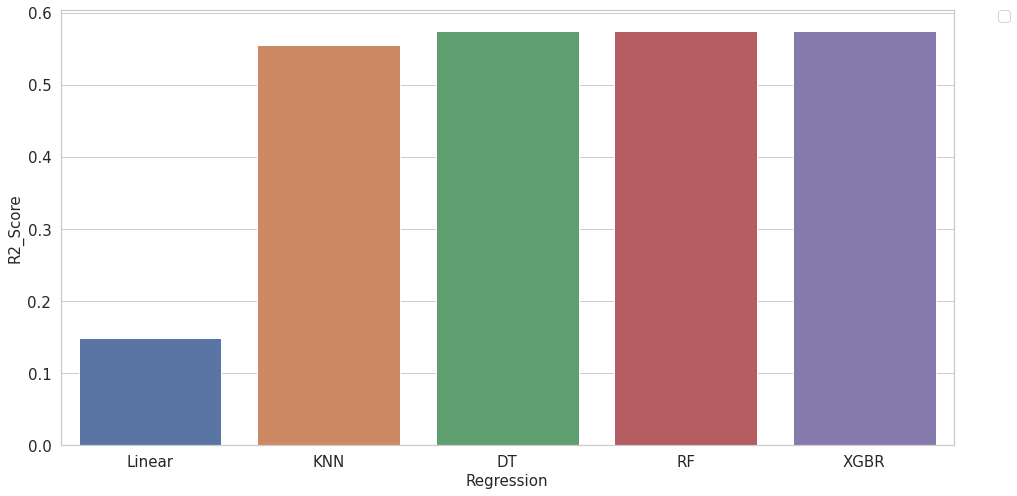

In [ ]:
for i in range(1,len(df_d)+1):
  print("******************************************************")
  print("ITEM : ",i)
  dfT=df_d[i]
  dfT=dfT.drop(['demand'], axis=1)

  x_train=dfT[(dfT['year']==2013) | (dfT['year']==2014) |(dfT['year']==2015)]
  y_train=df_d[i][(df_d[i]['year']==2013) | (df_d[i]['year']==2014) | (df_d[i]['year']==2015)]["demand"]
  x_test=dfT[(dfT['year']==2016) | (dfT['year']==2017)]
  y_test=df_d[i][(df_d[i]['year']==2016) | (df_d[i]['year']==2017)]["demand"]

  from sklearn.preprocessing import StandardScaler # importing the required function
  scaler = StandardScaler() #initialis
  scaler.fit(x_train) # find the values of mu and sigma
  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test) #only transform the test dataset, dont fit it

  #Linear Regression
  from sklearn.linear_model import LinearRegression #importing all the required functions
  regressor = LinearRegression()
  regressor.fit(x_train, y_train)
  y_pred = regressor.predict(x_test)

  from sklearn import metrics # metrics will contain all the evaluation metrics
  print('Linear Regression R2- SCORE:', metrics.r2_score(y_test,y_pred))
  lr_r=metrics.r2_score(y_test,y_pred)

  #K Nearest Neighbors Regression
  from sklearn.neighbors import KNeighborsRegressor
  knn_model = KNeighborsRegressor(n_neighbors=30)
  knn_model.fit(x_train, y_train)
  y_pred = knn_model.predict(x_test)
  print('K Nearest Neighbors Regression R2- SCORE:', metrics.r2_score(y_test,y_pred))
  knn_r=metrics.r2_score(y_test,y_pred)

  #Decision Tree Regression
  from sklearn.tree import DecisionTreeRegressor
  dt=DecisionTreeRegressor()
  dt.fit(x_train, y_train)
  y_pred = dt.predict(x_test)
  print('Decision Tree Regression R2- SCORE:', metrics.r2_score(y_test,y_pred))
  dt_r=metrics.r2_score(y_test,y_pred)

  #Random Forest Regression
  from sklearn.ensemble import RandomForestRegressor
  rf= RandomForestRegressor(n_estimators = 100, random_state = 11)
  rf.fit(x_train, y_train)
  y_pred = rf.predict(x_test)
  print('Random Forest Regression R2- SCORE:', metrics.r2_score(y_test,y_pred))
  rf_r=metrics.r2_score(y_test,y_pred)

  #XGBoost Regression
  import xgboost as xg
  xgb=xg.XGBRegressor(learning_rate = 0.15, n_estimators=100)
  xgb.fit(x_train, y_train)
  y_pred = xgb.predict(x_test)
  print('XGBoost Regression R2- SCORE:', metrics.r2_score(y_test,y_pred))
  xgb_r=metrics.r2_score(y_test,y_pred)

  df_results = pd.DataFrame({'Regression':['Linear','KNN','DT','RF','XGBR'],
                          'R2_Score':[lr_r,knn_r,dt_r,rf_r,xgb_r]})
  import seaborn as sns
  import matplotlib.pyplot as plt
  %matplotlib inline
  sns.set(style="whitegrid")
  sns.set_style("whitegrid")
  plt.figure(figsize=(16, 8))
  ax = sns.barplot(x = 'Regression', y = 'R2_Score', data = df_results)
  ax.set_xlabel('Regression', fontsize = 15)
  ax.set_ylabel('R2_Score', fontsize = 15)
  ax.tick_params(labelsize = 15)

  #Separate legend from graph
  plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

  print("*************************************************************")

# Best Regression Algorithm for predicting the given datasets.
**According to the above analysis XGBR gave the best prediction performance compared to other regressors.**